In [53]:
import os
import glob
import random
import numpy as np
import pandas as pd

import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

from tqdm import tqdm

from PIL import Image

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import ResNet50, InceptionV3
from sklearn.ensemble import VotingClassifier



import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt

In [54]:
label_df = pd.read_csv("C:\\Users\\royb3\\human_action_recg\\Human Action Recognition\\Training_set.csv")
test_csv = pd.read_csv("C:\\Users\\royb3\\human_action_recg\\Human Action Recognition\\Testing_set.csv")

In [55]:
label_df.shape

(12600, 2)

In [56]:
test_csv.shape

(5400, 1)

In [61]:
image_files = glob.glob("C:\\Users\\royb3\\human_action_recg\\Human Action Recognition\\train\\*") 
test_fol = glob.glob("C:\\Users\\royb3\\human_action_recg\\Human Action Recognition\\test\\*")

In [62]:
len(image_files)

12601

In [63]:
len(test_fol)

5410

In [64]:
train_csv=label_df
train_fol=image_files

In [65]:
filename = train_csv['filename']
situation = train_csv['label']

In [66]:
train_csv.label.value_counts()

sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: label, dtype: int64

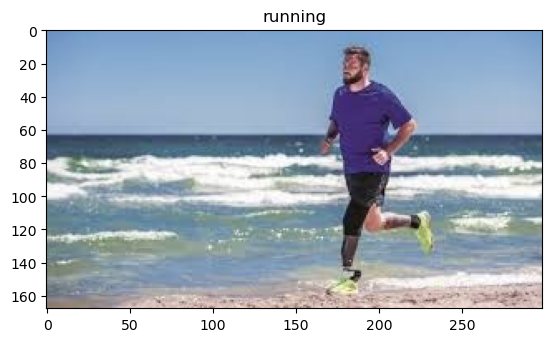

In [67]:
def disp():
    num = random.randint(1,10000)
    imgg = "Image_{}.jpg".format(num)
    train = "C:\\Users\\royb3\\human_action_recg\\Human Action Recognition\\train\\"
    if os.path.exists(train+imgg):
        testImage = img.imread(train+imgg)
        plt.imshow(testImage)
        plt.title("{}".format(train_csv.loc[train_csv['filename'] == "{}".format(imgg), 'label'].item()))

    else:
        #print(train+img)
        print("File Path not found \nSkipping the file!!")

disp()

In [68]:
img_data = []
img_label = []
length = len(train_fol)
for i in (range(len(train_fol)-1)):
    t = 'C:\\Users\\royb3\\human_action_recg\\Human Action Recognition\\train\\' + filename[i]    
    temp_img = Image.open(t)
    img_data.append(np.asarray(temp_img.resize((160,160))))
    img_label.append(situation[i])

In [70]:
inp_shape = (160,160,3)

In [71]:
iii = img_data
iii = np.asarray(iii)
type(iii)

numpy.ndarray

In [72]:
y_train = to_categorical(np.asarray(train_csv['label'].factorize()[0]))
print(y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [73]:
label_map = {
    0: "sitting",
    1: "using laptop",
    2: "hugging",
    3: "sleeping",
    4: "drinking",
    5: "clapping",
    6: "dancing",
    7: "cycling",
    8: "calling",
    9: "laughing",
    10: "eating",
    11: "fighting",
    12: "listening_to_music",
    13: "running",
    14: "texting"
}

In [75]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(160,160,3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(15, activation='softmax')
])
# compile CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 79, 79, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 77, 77, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 38, 38, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 36, 36, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 18, 18, 128)      

In [77]:
history = cnn_model.fit(iii,y_train, epochs=60)

Epoch 1/60
394/394 [==============================] - 579s 1s/step - loss: 6.4189 - accuracy: 0.0790
Epoch 2/60
394/394 [==============================] - 461s 1s/step - loss: 2.6905 - accuracy: 0.0878
Epoch 3/60
394/394 [==============================] - 519s 1s/step - loss: 2.6365 - accuracy: 0.1075
Epoch 4/60
394/394 [==============================] - 463s 1s/step - loss: 2.5597 - accuracy: 0.1375
Epoch 5/60
394/394 [==============================] - 447s 1s/step - loss: 2.4592 - accuracy: 0.1753
Epoch 6/60
394/394 [==============================] - 444s 1s/step - loss: 2.3248 - accuracy: 0.2173
Epoch 7/60
394/394 [==============================] - 470s 1s/step - loss: 2.1945 - accuracy: 0.2648
Epoch 8/60
394/394 [==============================] - 469s 1s/step - loss: 2.1044 - accuracy: 0.3014
Epoch 9/60
394/394 [==============================] - 537s 1s/step - loss: 1.9545 - accuracy: 0.3515
Epoch 10/60
394/394 [==============================] - 463s 1s/step - loss: 1.8790 - accura